### Нахождение сетки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PyEMD.EMD2d import EMD2D
emd2 = EMD2D()
%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [266]:
def main_points(maxes):
    main_points = []
    last_point = 0
    mean_point = []

    for point in maxes:
        if (point-1) == last_point:
            mean_point.append(point)
        else:            
          #  print(mean_point)
            if len(mean_point)!=0:
                main_points.append(np.mean(mean_point))
            mean_point = []
        last_point = point
    return main_points
    
def detect_start_point(p1,p2,p3):
    diff1 = p3 - p2
    diff2 = p2 - p1
    
    if diff1 > diff2:
        return p3
    else:
        return p2
    
def get_cell_param(lines):
    d1 = 0  
    d2 = 0
    d =[]
    
    for i in range(2,len(lines),2):
        d.append(abs(lines[i] - lines[i-1]))
    d1 = np.median(d)
    d = []
    for i in range(1,len(lines),2):
        d.append(abs(lines[i] -lines[i-1])) 
    d2 = np.median(d)

    return {"cell_width":max(d2,d1), "border":min(d2,d1)}    
        
        
def detect_grid_lines(image, direction = 0):
    h_line = np.median(image, 0)
    w_line = np.median(image, 1)
    diff_h = np.diff(moving_average(h_line, 4))
    h_maxes = np.where(abs(diff_h)>np.mean(np.abs(diff_h)))
    h_maxes = main_points(h_maxes[0])

    diff_w = np.diff(moving_average(w_line, 4))
    w_maxes = np.where(abs(diff_w)>np.mean(np.abs(diff_w)))
   # print(w_maxes)
    
    w_maxes = main_points(w_maxes[0])
   # print(w_maxes)
    start_point_h = int(detect_start_point(h_maxes[1],h_maxes[2],h_maxes[3]))
    start_point_w = int(detect_start_point(w_maxes[1],w_maxes[2],w_maxes[3]))
    
    if direction == 0:
        params = get_cell_param(w_maxes[1:] + h_maxes[1:])
    if direction == 1:
        params = get_cell_param(w_maxes[1:] )
    if direction == 2:
        params = get_cell_param(h_maxes[1:] )
    width = params["cell_width"]
    border = params["border"]
    
    return {'start_h': start_point_h, 'start_w': start_point_w, 'width_lines': w_maxes, 'height_lines': h_maxes, 
           'cell_width':width, 'border':border}

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def drow_grid(image, start_point, width, border):
    
    image = image.copy()
    x, y = start_point
    fill = np.max(image)*1.6
    for i in range(int(x), image.shape[0], int(width+border)):
        image[i:i+3,:] = fill
        image[i+int(border):i+int(border)+3,:] = fill
    for i in range(int(x), 0, -int(width+border)):
        image[i:i+3,:] = fill
        image[i+int(border):i+int(border)+3,:] = fill
    for i in range(int(y), image.shape[1], int(width+border)):
        image[:,i:i+3] = fill
        image[:,i+int(border):i+int(border)+3] = fill
    for i in range(int(y), 0, -int(width+border)):
        image[:,i:i+3] = fill
        image[:,i+int(border):i+int(border)+3] = fill
    return image
    

In [197]:
h5f = h5py.File('file1.h5','r')
arr = h5f["data"][:]
h5f.close()

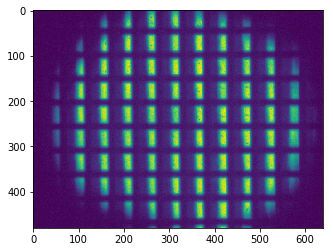

In [198]:
img = arr[0]
plt.imshow(img)

In [271]:
p2 = detect_grid_lines(img, 2)
grid_img = drow_grid(img, (p2['start_w']-10, p2['start_h']+20), p2['cell_width'], p2['border'])

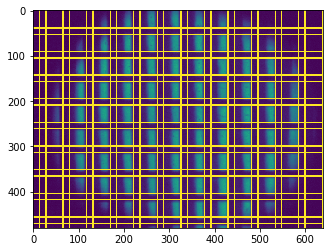

In [272]:
plt.imshow(grid_img)

In [201]:
print(p2)

{'start_h': 149, 'start_w': 48, 'width_lines': [23.0, 37.0, 48.0, 54.0, 69.0, 89.5, 105.5, 142.0, 156.5, 165.0, 172.0, 182.0, 194.0, 208.5, 245.5, 252.5, 260.5, 301.0, 315.0, 345.0, 353.0, 367.0, 377.0, 397.0, 403.5, 420.0, 442.0], 'height_lines': [96.5, 101.0, 109.5, 149.5, 163.5, 201.0, 216.0, 254.0, 268.5, 305.5, 321.0, 358.5, 373.0, 410.0, 426.0, 462.5, 478.5, 514.0], 'cell_width': 35.5, 'border': 14.5}


In [202]:
h5f = h5py.File('file2.h5','r')
data = h5f["data"][:]
h5f.close()
image = data[0]
p = detect_grid_lines(image)
grid_img = drow_grid(image, (p['start_w'], p['start_h']), p['cell_width'], p['border'])

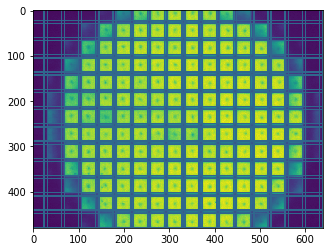

In [203]:
plt.imshow(grid_img)

In [204]:
print(p)

{'start_h': 137, 'start_w': 97, 'width_lines': [27.5, 59.5, 65.5, 97.5, 104.0, 135.0, 142.0, 173.0, 180.5, 211.0, 218.0, 249.0, 256.5, 287.0, 295.0, 325.0, 333.0, 363.5, 371.0, 401.5, 408.0], 'height_lines': [67.0, 105.5, 137.5, 144.0, 175.0, 182.0, 213.0, 220.0, 251.0, 258.0, 289.0, 296.0, 327.0, 334.0, 365.0, 372.0, 403.0, 410.0, 441.0, 448.0, 479.0, 486.5, 517.0, 524.5, 555.5], 'cell_width': 30.75, 'border': 7.5}


In [278]:
h5f = h5py.File('file3.h5','r')
data = h5f["image"][:]
h5f.close()

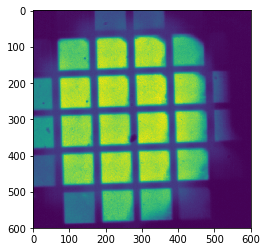

In [283]:
plt.imshow(data[0])


In [284]:
from scipy.ndimage.interpolation import rotate

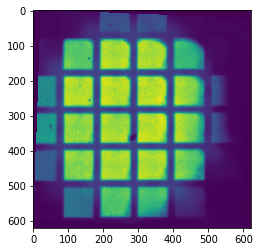

In [298]:
rotated = rotate(data[0], -1.99999, reshape=True)
plt.imshow(rotated)


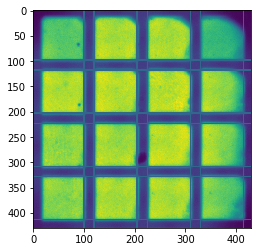

In [313]:
p3 = detect_grid_lines(rotated[70:500,70:500],0)
grid_img = drow_grid(rotated[70:500,70:500], (p3['start_w'], p3['start_h']), p3['cell_width'], p3['border'])
plt.imshow(grid_img)

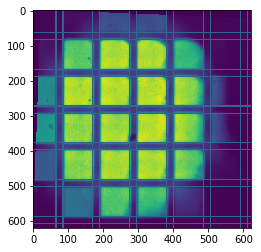

In [327]:
grid_img = drow_grid(rotated, (p3['start_w']-35, p3['start_h']-35), p3['cell_width'], p3['border'])
plt.imshow(grid_img)

### Направление освещения

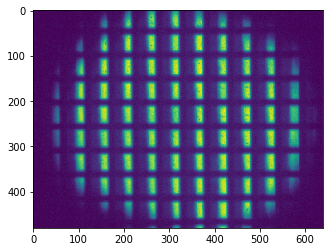

In [219]:
imf2d = emd2(img)
plt.imshow(imf2d[0] + imf2d[1])

In [220]:
x = np.where(imf2d[1] == np.max(imf2d[1]) )[0][0]
y = np.where(imf2d[1] == np.max(imf2d[1]) )[1][0]

x_mean = img.shape[0]//2
y_mean = img.shape[1]//2

if x>x_mean and y>y_mean:
    print('right_bottom angle')
elif x<x_mean and y<y_mean:
    print('left_top angle')
elif x>x_mean and y<y_mean:
    print('right_top angle')
elif x<x_mean and y>y_mean:
    print('left_bottom angle')
    
print(x,y)

right_bottom angle
478 639
